In [0]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import fmin_bfgs

data = np.loadtxt('log_reg_data2.txt', delimiter=',')
x = data[:, :2]
y = data[:, 2]

m = len(y)

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

### Visualizing Data

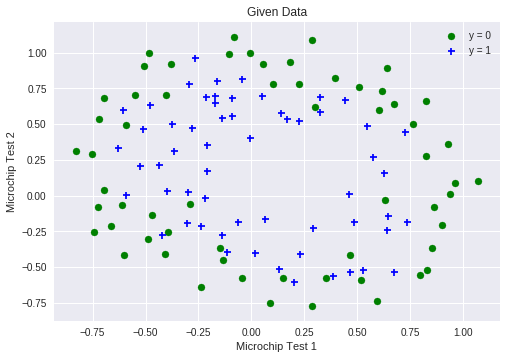

In [0]:
def plotGraph():
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]
	
    plt.scatter(x[neg, 0], x[neg, 1], label= "0", color= "green", marker= "o")
    plt.scatter(x[pos, 0], x[pos, 1], label= "1", color= "blue", marker= "+")
	
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.title('Given Data')
    plt.legend(['y = 0', 'y = 1'], loc='upper right')
    plt.show()

plotGraph()

### Synthetic features

In [0]:
def mapFeature(X1, X2, degree=6):
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)
  
X = mapFeature(x[:,0], x[:, 1])

print(X.shape)
print(y.shape)

(118, 28)
(118,)


### Sigmoid and regularized cost function

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [0]:
def cost_function_reg(w, X, y, Lambda):
    m = y.size
    h = sigmoid(np.dot(X, w))
    
    J = ((np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) / (-m)) + ((Lambda / (2*m)) * np.sum(w[1:]**2))
    #print(w[:, 0:1]**2)
    
    grad = (1/m) * np.dot(X.T, h-y) + (Lambda/m) * w
    grad[0] = (1/m) * np.dot(X[:,0:1].T, h-y)
    
    return J.flatten()[0], grad

### Test cost function

In [0]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = cost_function_reg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = cost_function_reg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


### Gradient Descent

In [0]:
def gradient_descent(w, alpha, iters):
    #w = np.ndarray.copy(w)
    #print(w)
    J_history = np.zeros([iters, 1])
    
    for iter in range(iters):
        prediction = sigmoid(np.dot(X, w))
        prediction.shape = (m,1)
        gradient = prediction - y
        
        for j in range(np.shape(X)[1]):
            w[j] = w[j] - (alpha / m) * np.sum(gradient * X[:, j:j+1])
                
        #print(gradient)
        J_history[iter] = cost_function(w)
        #print(iter, J_history[iter])
    
    #print(w)
    return w, J_history


w1, J_history_1 = gradient_descent(np.zeros([n+1, 1]), 0.001, 2000)
print("Cost", cost_function(w1))
print("Param", w1, "\n")

w2, J_history_2 = gradient_descent(np.random.random((3, 1)), 0.0009, 1400)
print("Cost", cost_function(w2))
print("Param", w2, "\n")

### Optimization

In [0]:
def optimize_log(Lambda):
    options= {'maxiter': 400}

    res = optimize.minimize(cost_function_reg,
                            initial_theta,
                            (X, y, Lambda),
                            jac=True,
                            method='TNC',
                            options=options)
    return res

### Cost and Learning Rate

In [0]:
def plot_cost_and_itrs(J_history, alpha, iterations):
    itrs = [x for x in range(1, iterations+1)]
    plt.plot(itrs, J_history)
    plt.xlabel('Number of iterations')
    plt.ylabel('J')
    plt.title("Alpha = " + alpha)
    plt.show()

In [0]:
#plot_cost_and_itrs(J_history_1, "0.0001", 2000)
#plot_cost_and_itrs(J_history_2, "0.0009", 1400)

### Decision Boundary

In [0]:
def plotDecisionBoundary(theta, X, y, Lambda):
    theta = np.array(theta)
    
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]
	
    plt.scatter(x[neg, 0], x[neg, 1], label= "0", color= "green", marker= "o")
    plt.scatter(x[pos, 0], x[pos, 1], label= "1", color= "blue", marker= "+")

    if X.shape[1] <= 3:
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        plt.plot(plot_x, plot_y)

        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T 

        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
        
        plt.xlabel('Microchip Test 1')
        plt.ylabel('Microchip Test 2')
        plt.legend(['y = 1', 'y = 0'])
        plt.title('lambda = %0.2f' % Lambda)

At lambda : 0
Optimized Cost: 0.248
theta:
[  14.0235244    16.96730724   12.88899379 -141.93657517  -82.15641879]

At lambda : 1
Optimized Cost: 0.529
theta:
[ 1.27271027  0.62529965  1.18111686 -2.01987399 -0.9174319 ]

At lambda : 50
Optimized Cost: 0.681
theta:
[ 0.0698778  -0.02819758  0.01713415 -0.10711569 -0.02528839]



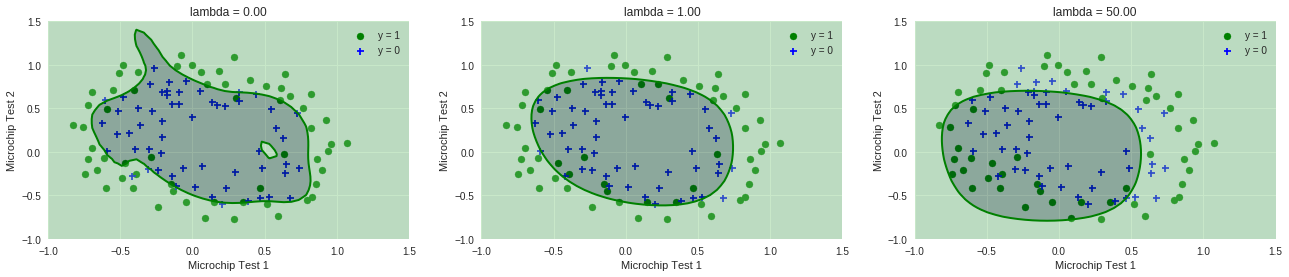

In [0]:
Lambda = [0, 1, 50]

plt.figure(figsize=(22,4))
results = []

for i in range(len(Lambda)):
    r = optimize_log(Lambda[i])
    cost = r.fun
    theta = r.x
    results.append(theta)
    
    print("At lambda :", Lambda[i])
    print('Optimized Cost: {:.3f}'. format(cost))
    print('theta:')
    print(theta[:5])
    print()    

    plt.subplot(1, 3, i + 1)
    plotDecisionBoundary(theta, X, y, Lambda[i])

### Predict

In [0]:
def predict(theta, X):
    m = X.shape[0]
    
    p = np.dot(X, theta)
    
    for i in range(m):
        if(p[i] >= 0.5):
            p[i] = 1
        else:
            p[i] = 0
    
    return p

In [0]:
for i in range(len(Lambda)):
    p = predict(results[i], X)
    print("Training accuracy is {:.2f} % when lambda = {}". format(np.mean(p == y) * 100, Lambda[i]))

Training accuracy is 87.29 % when lambda = 0
Training accuracy is 79.66 % when lambda = 1
Training accuracy is 50.85 % when lambda = 50
